In [23]:
import requests
import json
import pandas as pd
import seaborn as sn

In [3]:
data = pd.read_csv("data_set/lat_long.csv")

In [4]:
data.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


0      28.6600
1      18.9667
2      22.5411
3      12.9699
4      13.0825
        ...   
401    24.5925
402    15.2500
403    10.5626
404    30.6915
405    19.3316
Name: lat, Length: 406, dtype: float64

In [5]:
def find_elevation(lat, lng):
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lng}"
    try:
        response = requests.get(url, verify=False)
        data = json.loads(response.content.decode('utf-8'))
    except Exception as e:
        print(f"Some error occuered. Error is {e}")
    return data["results"][0]["elevation"]

In [9]:
df = pd.read_csv("data_set/modified_lat_long.csv")

In [12]:
df["elevation"].median()    

165.0

In [14]:
df["elevation"].std()

365.43409980327914

In [17]:
df["elevation"].describe()

count     406.00000
mean      267.64532
std       365.43410
min        -1.00000
25%        27.25000
50%       165.00000
75%       345.75000
max      2250.00000
Name: elevation, dtype: float64

In [22]:
df["elevation"].quantile(0.99)

1964.0999999999972

In [32]:
mean = df["elevation"].mean()
std = df["elevation"].std()




In [34]:
mean + 3 *std

1363.9476196068817

In [33]:
mean - 3* std

-828.656979212793

<AxesSubplot:xlabel='elevation', ylabel='Count'>

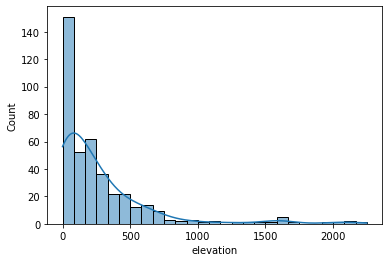

In [26]:
sn.histplot(df["elevation"], kde=True)

In [29]:
df[df["elevation"]>(mean+3*std)]

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,elevation
36,Srīnagar,34.0911,74.8061,India,IN,Jammu and Kashmīr,admin,1180570.0,1180570.0,1596
153,Handwāra,34.4000,74.2800,India,IN,Jammu and Kashmīr,NaN,269311.0,269311.0,1604
178,Shimla,31.1033,77.1722,India,IN,Himāchal Pradesh,admin,206575.0,206575.0,2111
212,Bāramūla,34.2000,74.3400,India,IN,Jammu and Kashmīr,NaN,167986.0,167986.0,1598
242,Shillong,25.5744,91.8789,India,IN,Meghālaya,admin,143229.0,143229.0,1499
268,Darjeeling,27.0417,88.2631,India,IN,West Bengal,NaN,118805.0,118805.0,2041
269,Sopur,34.3000,74.4700,India,IN,Jammu and Kashmīr,NaN,118608.0,118608.0,1582
290,Gangtok,27.3300,88.6200,India,IN,Sikkim,admin,100286.0,100286.0,1586
291,Kohīma,25.6667,94.1194,India,IN,Nāgāland,admin,99039.0,99039.0,1392
299,Ootacamund,11.4086,76.6939,India,IN,Tamil Nādu,NaN,88430.0,88430.0,2250


In [36]:
new_df = df[ (df["elevation"] > -828.656979212793) & (df["elevation"] < 1363.9476196068817) ]

<AxesSubplot:xlabel='elevation', ylabel='Count'>

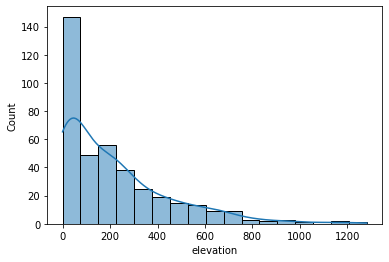

In [38]:
sn.histplot(new_df['elevation'], kde=True)